# Convolutional Neural Networks
## Vedhas B Achar

In [23]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import imghdr

In [84]:
labels = os.listdir('Data')
labels

['Ballerina_Cappuccina',
 'Bombardino_Crocodilo',
 'Brr_Brr_Patapim',
 'Cappuccino_Assassino',
 'Tralalero_Tralala',
 'Tung_Tung_Tung_Sahur']

## Removing weird Pictures

In [25]:
for label in os.listdir('Data'):
    for img in os.listdir(os.path.join('Data', label)):
        img_path = os.path.join('Data', label, img)
        tip = imghdr.what(img_path)
        if tip not in ['jpeg', 'jpg', 'bmp', 'png']:
            print("image getting removed")
            os.remove(img_path)

## Loading Data

In [26]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 1627 files belonging to 6 classes.


In [27]:
data_it = data.as_numpy_iterator()
batch = data_it.next()
batch[0].shape

(32, 256, 256, 3)

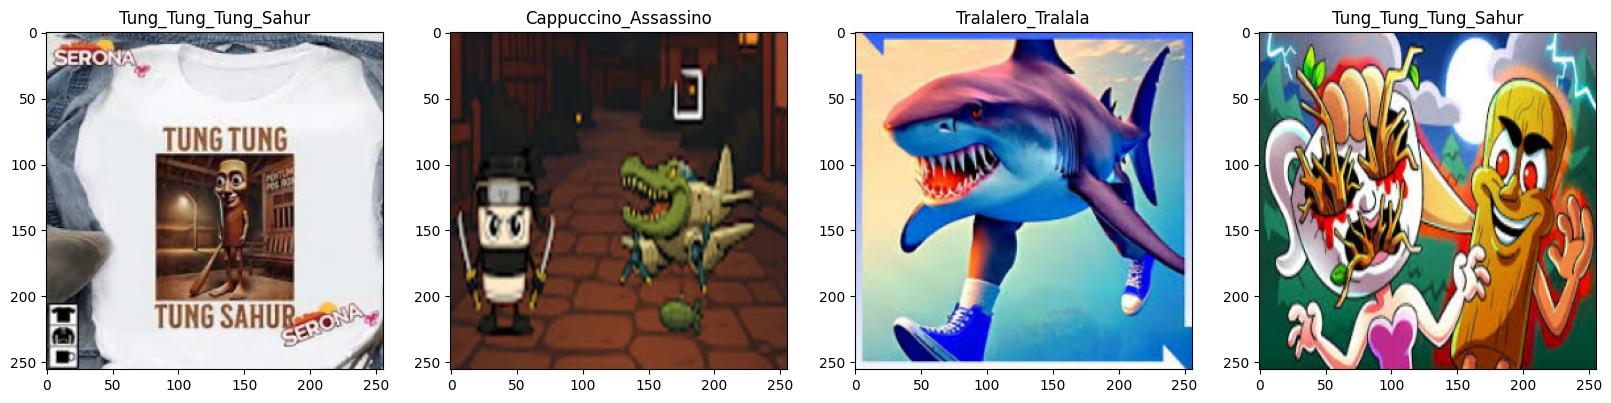

In [28]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(labels[batch[1][idx]])

## PreProcessing

In [31]:
data = data.map(lambda x, y: (x/255, y))

In [32]:
scaled_it = data.as_numpy_iterator()

In [33]:
scaled_batch = scaled_it.next()

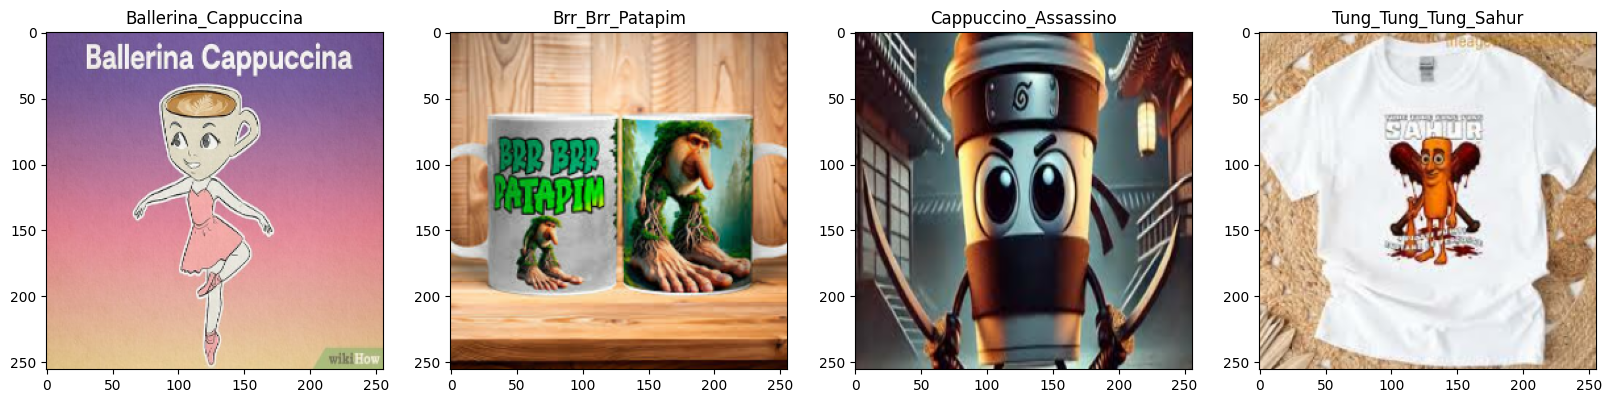

In [39]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(labels[scaled_batch[1][idx]])

## Splitting

In [42]:
n = len(data)
n

51

In [43]:
tr_size = int(n * 0.7)
v_size = int(n * 0.2)
te_size = n - tr_size - v_size

In [47]:
train = data.take(tr_size)
val = data.skip(tr_size).take(v_size)
test = data.skip(tr_size + v_size).take(te_size)

## Making Model

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [52]:
model = Sequential()

In [53]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

C:\Users\pavan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
model.compile('adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,697,910 (14.11 MB)

 Trainable params: 3,697,910 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [56]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = 'logs')

In [58]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tb_callback])

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 406ms/step - accuracy: 0.2344 - loss: 1.9237 - val_accuracy: 0.3594 - val_loss: 1.5228
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 420ms/step - accuracy: 0.3976 - loss: 1.4785 - val_accuracy: 0.4469 - val_loss: 1.3953
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 413ms/step - accuracy: 0.5420 - loss: 1.1921 - val_accuracy: 0.5500 - val_loss: 1.1986
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 429ms/step - accuracy: 0.6583 - loss: 0.9231 - val_accuracy: 0.6438 - val_loss: 0.9727
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 405ms/step - accuracy: 0.7905 - loss: 0.6271 - val_accuracy: 0.6812 - val_loss: 0.9687
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 396ms/step - accuracy: 0.8139 - loss: 0.5657 - val_accuracy: 0.7219 - val_loss: 0.8344
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 406ms/step - accuracy: 0.9015 - loss: 0.3173 - val_accuracy: 0.7406 - val_loss: 0.9029
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 408ms/step - accuracy: 0.9273 - loss: 0.2668 - val_accu

## Performance Plotting

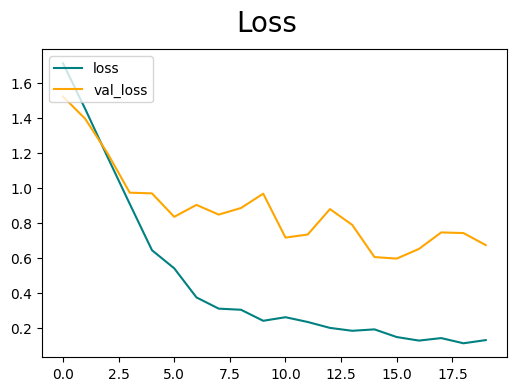

In [63]:
plt.figure(figsize = (6,4))
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
plt.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

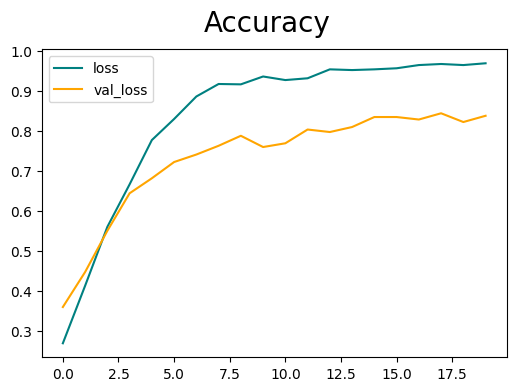

In [64]:
plt.figure(figsize = (6,4))
plt.plot(hist.history['accuracy'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_loss')
plt.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

## Testing

In [85]:
img = cv2.imread('imgtest.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

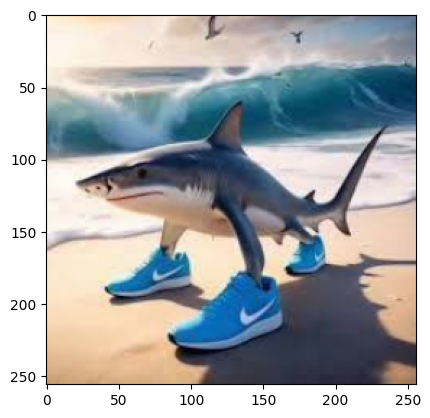

In [86]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [87]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [88]:
labels[np.argmax(yhat)]

'Tralalero_Tralala'